# Data Science

`-` Conv 역할, Maxpool 역할, Discussion(CNN의 모티브, CNN 신경망의 기본구조)

- lenture: Data Science_12-1nd week of lectures.
- lenture date: 2022-05-18
- lecturer: Guebin choi
- study date: 2022-05-18
- author: Kione kim

In [13]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

## Conv의 역할

### 1. Conv 적용

`-` 데이터 생성   
: 흑백대비 데이터

In [8]:
_X1 = tnp.ones([50,25])*10
_X2 = tnp.zeros([50,25])

In [18]:
tf.concat([_X1,_X2],axis=1)

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       ...,
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.],
       [10., 10., 10., ...,  0.,  0.,  0.]])>

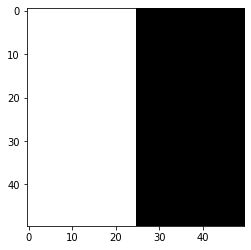

In [20]:
plt.imshow(tf.concat([_X1,_X2],axis=1),cmap='gray')

- 현재 값이 10이면 하얀색, 값이 0이면 검정색으로 표현됨

`-` 노이즈 추가

In [21]:
_noise = tnp.random.randn(50*50).reshape(50,50)
_noise

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[-1.34510102,  0.21841479,  0.03761151, ...,  0.49258712,
        -0.74879305,  0.96722783],
       [-0.43654925, -0.88560902, -0.02033482, ..., -0.23227575,
        -0.21047269, -0.73302396],
       [-0.87959726,  1.71842283,  1.1378473 , ..., -0.21608734,
         1.37635154,  0.24020996],
       ...,
       [ 1.72475535, -2.66630128,  1.29803967, ...,  1.67214765,
        -2.3826725 ,  0.5017238 ],
       [ 0.09468097,  0.04685242,  1.64217034, ..., -0.46424598,
         1.73858117,  0.23961314],
       [-0.28814265,  0.68487272,  1.11375007, ..., -0.02374464,
         0.49879731,  1.69627397]])>

In [29]:
XXX = tf.concat([_X1,_X2],axis=1) + _noise
XXX = XXX.reshape(1,50,50,1) # 4-dimension으로 선언

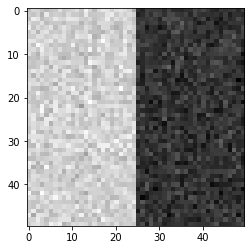

In [31]:
plt.imshow(XXX.reshape(50,50),cmap='gray') # dimension을 이미지 차원으로 설정하여 그림

- 데이터 생성완료

`-` conv layer 생성

In [39]:
conv = tf.keras.layers.Conv2D(2,(2,2)) # 출력차원 2

In [48]:
conv(XXX)
conv.get_weights() # kernel, bias

[array([[[[ 0.23583657, -0.56552875]],
 
         [[-0.40883893, -0.35263997]]],
 
 
        [[[-0.22676554, -0.6912004 ]],
 
         [[ 0.43709332,  0.2601651 ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

`-` 필터값(w)을 원하는 것으로 변경

In [49]:
w0= [[0.25,0.25],[0.25,0.25]]
w1= [[-1.0,1.0],[-1.0,1.0]]
np.array(w0),np.array(w1)

(array([[0.25, 0.25],
        [0.25, 0.25]]),
 array([[-1.,  1.],
        [-1.,  1.]]))

- w0는 평균을 구해주는 필터로, 잡티를 제거하는 효과가 있다.
- w1는 경계를 찾기 좋아보이는 필터이다. -> 엣지검출

`-` 현재 만들고 싶은 형태

In [55]:
conv.get_weights()[0],conv.get_weights()[0].shape

(array([[[[ 0.23583657, -0.56552875]],
 
         [[-0.40883893, -0.35263997]]],
 
 
        [[[-0.22676554, -0.6912004 ]],
 
         [[ 0.43709332,  0.2601651 ]]]], dtype=float32),
 (2, 2, 1, 2))

- w값을 위의 같은 형태로 설정하여 set_weight를 통해 입력!

In [57]:
print(np.array(w0).reshape(2,2,1,1))
print(np.array(w1).reshape(2,2,1,1))

[[[[0.25]]

  [[0.25]]]


 [[[0.25]]

  [[0.25]]]]
[[[[-1.]]

  [[ 1.]]]


 [[[-1.]]

  [[ 1.]]]]


- 이 둘을 옆으로 붙여주면 위의 형태가 될 것 같음 -> `concatenate()`사용

In [64]:
w= np.concatenate([np.array(w0).reshape(2,2,1,1),np.array(w1).reshape(2,2,1,1)],axis=-1)
w, w.shape

(array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]]),
 (2, 2, 1, 2))

- 위와 같은 형태로 설정됨

`-` bias 설정

In [65]:
b= np.array([0.0,0.0])
b

array([0., 0.])

`-` weight 변경

In [68]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]],
 
 
        [[[ 0.25, -1.  ]],
 
         [[ 0.25,  1.  ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

- w0= 평균을 구하는 필터
- w1= 엣지를 검출하는 필터

`-` 결과 확인

In [70]:
# conv(XXX)

In [79]:
conv(XXX)[...,0] # 채널0

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 9.387789  ,  9.837521  ,  9.252666  , ..., -0.22980246,
         -0.1747386 , -0.18126547],
        [ 9.879167  , 10.487581  ,  9.422289  , ..., -0.65116   ,
          0.17937896,  0.16826622],
        [10.26644   , 10.459425  , 10.040457  , ..., -0.19978078,
          0.3209098 ,  0.4763044 ],
        ...,
        [10.128876  ,  9.689629  ,  9.887571  , ...,  0.71225226,
          0.06579763, -0.26632276],
        [ 9.799996  , 10.08019   , 11.056025  , ...,  0.30478737,
          0.14095259,  0.02431139],
        [10.134565  , 10.871911  , 10.744799  , ..., -0.1415725 ,
          0.437347  ,  1.0433164 ]]], dtype=float32)>

In [74]:
conv(XXX)[...,1] # 채널1

<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
array([[[ 1.1144562 ,  0.68447113, -3.0238895 , ...,  1.4398326 ,
         -1.2195771 ,  1.1934696 ],
        [ 2.14896   ,  0.2846985 , -4.545868  , ...,  1.7079139 ,
          1.614242  , -1.6586928 ],
        [ 1.376854  , -0.6049156 , -1.0709591 , ...,  0.3157665 ,
          1.7669959 , -1.1454175 ],
        ...,
        [-2.5931187 ,  0.83613014, -0.04435921, ...,  2.7266917 ,
         -5.3125105 ,  3.9840288 ],
        [-4.4388847 ,  5.559658  , -1.6563187 , ...,  1.196654  ,
         -1.8519931 ,  1.3854283 ],
        [ 0.92518616,  2.0241966 , -2.5326462 , ..., -0.40969118,
          2.7253692 , -0.3014915 ]]], dtype=float32)>

`-` 시각화

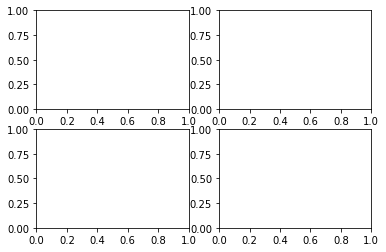

In [76]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

In [77]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')
ax3.imshow(conv(XXX)[...,0],cmap='gray')
ax4.imshow(conv(XXX)[...,1],cmap='gray')

TypeError: Invalid shape (1, 49, 49) for image data

`-` shape

In [84]:
conv(XXX).shape

TensorShape([1, 49, 49, 2])

In [82]:
conv(XXX)[...,0].shape

TensorShape([1, 49, 49])

In [83]:
conv(XXX)[...,1].shape

TensorShape([1, 49, 49])

그림을 그려주기 위해선 이미지 차원으로 넣어주어야 함. 위 이미지의 차원은 50에서 -1 된 (49,49)

In [85]:
XXX0 = conv(XXX)[...,0]
XXX1 = conv(XXX)[...,1]

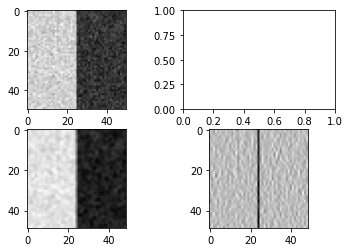

In [87]:
ax1.imshow(XXX.reshape(50,50),cmap='gray')
ax3.imshow(XXX0.reshape(49,49),cmap='gray')
ax4.imshow(XXX1.reshape(49,49),cmap='gray')
fig

- 2사분면: 원래 이미지
- 3사분면: 원래 이미지 -> 평균을 의미하는 conv 적용
- 4사분면: 원래 이미지 -> 엣지를 검출하는 conv 적용

### 2. Conv 적용 후 각 채널에 다시 적용
: conv(XXX)의 각 채널에 한 번 더 conv를 적용

`-` 데이터

: XXX0, XXX1

In [96]:
XXX0, XXX0.shape

(<tf.Tensor: shape=(1, 49, 49), dtype=float32, numpy=
 array([[[ 9.387789  ,  9.837521  ,  9.252666  , ..., -0.22980246,
          -0.1747386 , -0.18126547],
         [ 9.879167  , 10.487581  ,  9.422289  , ..., -0.65116   ,
           0.17937896,  0.16826622],
         [10.26644   , 10.459425  , 10.040457  , ..., -0.19978078,
           0.3209098 ,  0.4763044 ],
         ...,
         [10.128876  ,  9.689629  ,  9.887571  , ...,  0.71225226,
           0.06579763, -0.26632276],
         [ 9.799996  , 10.08019   , 11.056025  , ...,  0.30478737,
           0.14095259,  0.02431139],
         [10.134565  , 10.871911  , 10.744799  , ..., -0.1415725 ,
           0.437347  ,  1.0433164 ]]], dtype=float32)>,
 TensorShape([1, 49, 49]))

`-` 수행

In [100]:
conv(XXX0.reshape(1,49,49,1))[...,0] # XXX0 -> 평균필터 <=> XXX -> 평균필터 -> 평균필터  
conv(XXX0.reshape(1,49,49,1))[...,1] # XXX0 -> 엣지필터 <=> XXX -> 평균필터 -> 엣지필터  
conv(XXX1.reshape(1,49,49,1))[...,0] # XXX1 -> 평균필터 <=> XXX -> 엣지필터 -> 평균필터
conv(XXX1.reshape(1,49,49,1))[...,1] # XXX1 -> 엣지필터 <=> XXX -> 엣지필터 -> 엣지필터

<tf.Tensor: shape=(1, 48, 48), dtype=float32, numpy=
array([[[ -2.2942467 ,  -8.538927  ,  14.904308  , ...,   7.903827  ,
          -2.7530818 ,  -0.8598881 ],
        [ -3.8460312 ,  -5.29661   ,   8.608227  , ...,   5.0291777 ,
           1.3575575 ,  -6.1853485 ],
        [  3.2977867 ,  -1.3630886 ,  -2.4286804 , ...,   0.06698084,
           1.4979401 ,  -1.1028247 ],
        ...,
        [  0.98975563,  -0.9319668 ,   4.7322865 , ...,   8.956378  ,
         -11.590476  ,  10.8811655 ],
        [ 13.427792  ,  -8.096466  ,   1.2673149 , ...,   5.315732  ,
         -11.087849  ,  12.53396   ],
        [ 11.097553  , -11.7728195 ,   0.15102577, ...,   2.7260733 ,
           0.08641338,   0.21056068]]], dtype=float32)>

`-` 시각화

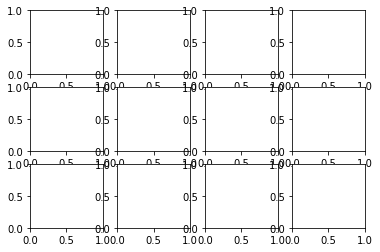

In [102]:
fig, ax = plt.subplots(3,4)

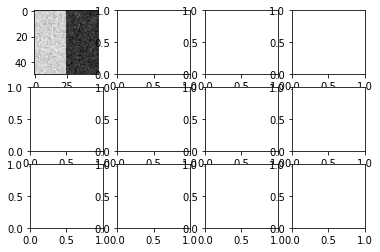

In [109]:
ax[0][0].imshow(XXX.reshape(50,50),cmap='gray') # 원래이미지
fig

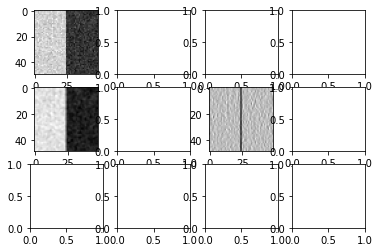

In [110]:
ax[1][0].imshow(XXX0.reshape(49,49),cmap='gray') # 원래 이미지 -> 평균필터
ax[1][2].imshow(XXX1.reshape(49,49),cmap='gray') # 원래 이미지 -> 엣지필터
fig

In [115]:
XXX00 = conv(XXX0.reshape(1,49,49,1))[...,0]
XXX01 = conv(XXX0.reshape(1,49,49,1))[...,1]
XXX10 = conv(XXX0.reshape(1,49,49,1))[...,0]
XXX11 = conv(XXX0.reshape(1,49,49,1))[...,1]
XXX00.shape

TensorShape([1, 48, 48])

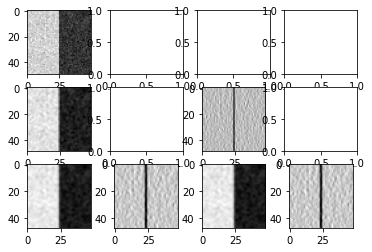

In [116]:
ax[2][0].imshow(XXX00.reshape(48,48),cmap='gray') # 원래 이미지 -> 평균필터 -> 평균필터
ax[2][1].imshow(XXX01.reshape(48,48),cmap='gray') # 원래 이미지 -> 평균필터 -> 엣지필터
ax[2][2].imshow(XXX10.reshape(48,48),cmap='gray') # 원래 이미지 -> 엣지필터 -> 평균필터
ax[2][3].imshow(XXX11.reshape(48,48),cmap='gray') # 원래 이미지 -> 엣지필터 -> 엣지필터
fig

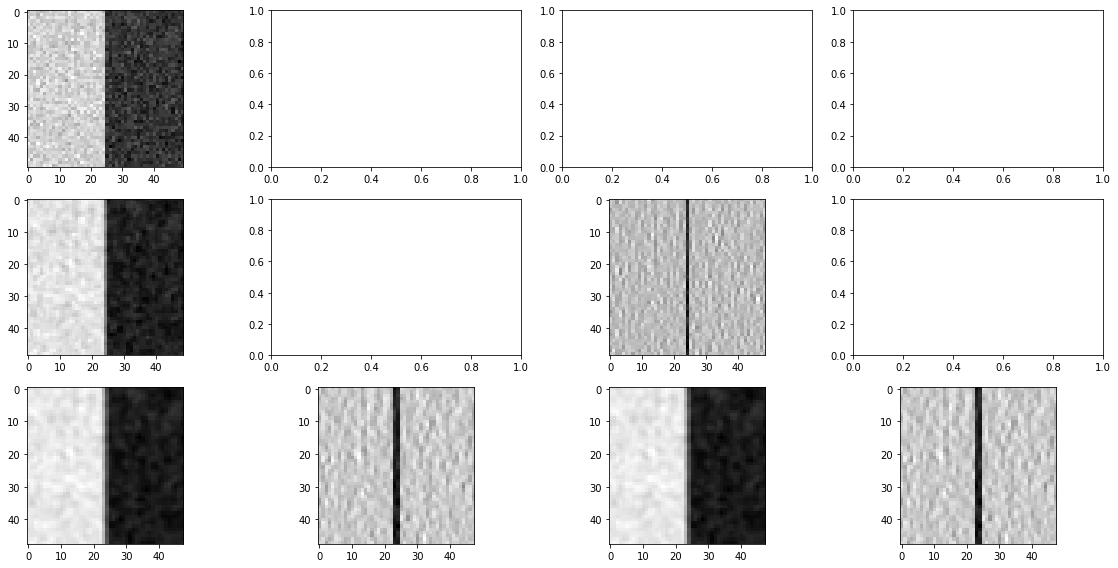

In [118]:
fig.set_figheight(8)
fig.set_figwidth(16)
fig.tight_layout()
fig

`-` 요약 
- conv의 weight에 따라서 엣지를 검출하는 필터가 만들어지기도 하고 스무딩의 역할을 하는 필터가 만들어지기도 한다. 그리고 의미를 알 수 없지만 또 어떠한 역할을 하는 필터가 존재할 것이고 새롭게 만들어지기도 할 것이다. 
- 이것들을 조합하다보면 우연히 이미지를 분류하기에 유리한 특징을 뽑아내는 weight가 맞춰질 수도 있을 것이다.
- 실험적으로 채널수를 많이 만들고 다양한 웨이트 조합을 시도하다보면 보다 복잡한 이미지의 특징을 추출하는 것을 발견할 수도 있다. 
- 컨볼루션 레이어의 역할 = 이미지의 특징을 추출하는 역할 

`-` cf. 스트라이드, 패딩
- 스트라이드: 윈도우가 1칸씩 이동하는 것이 아니라 2~3칸씩 이동한다.
- 패딩: 이미지의 가장자리에 정당한 값을 넣어서 (예를들어 0) 컨볼루션을 수행한다. 따라서 컨볼루션 연산 이후에도 이미지의 크기가 줄어들지 않도록 방지한다. 예를 들어, kernel_size가 (2,2)인 경우 28 × 28 이미지를 컨볼루션 하면 27 × 27 이미지가 나오는데, 패딩을 활용하면 28 × 28 이미지로 크기가 줄어들지 않는다.

## Maxpool의 역할

`-` 역할: 이미지의 크기를 줄이는 것 + 중요한 특징 유지!
- 이미지의 크기를 줄여야하는 이유는 어차피 최종적으로 10차원으로 줄어야하기 때문! 그렇기 때문에 중간중간 압축해나가는 것(줄여나가는 것)! 
- Flttn 했을 때 n×p의 p가 너무 크면 마지막 10으로 줄일 때 특징을 효율적으로 얻기 힘들 수 있으므로!
- 이미지의 크기를 줄이면서도 동시에 아주 중요한 특징은 손실없이 유지하고 싶음!

`-` 점점 작은 이미지가 되면서 중요한 특징들만 살아남는다. 그렇지 않은 것은 살아남지 못함. 마치 캐리커쳐처럼!

`-` 평균이 아니라 max를 쓰는 이유: 평균보다 특징을 잘 뽑아낼 것이라 생각했기 때문
- 그런데 실제로 꼭 그렇지만은 않아서, 최근에는 맥스풀링을 고집하지 않고 평균풀링도 많이 사용한다.

### CNN 아키텍처의 표현방법

`-` 노드별로 이미지를 그리기보다 아래와 같이 아키텍처의 다이어그램 형태로 표현함

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/2560px-Comparison_image_neural_networks.svg.png)

## Discusstion

`-` 격자형태로 배열된 자료를 처리하는데 특화된 신경망이다. 
- 시계열 (1차원격자), 이미지 (2차원격자)
- 실제 응용에서 엄청난 성공을 거두었다. 

`-` CNN 이라는 이름은 컨볼루션이라는 수학적 연산을 사용한 것에서 유래되었다.
- 컨볼루션은 조금 특별한 선형변환이다. 

`-` 신경과학의 원리가 심층학습에 영향을 미친 사례이다. 

### CNN의 모티브

`-` 희소성 & 매개변수의 공유
- 희소성: 이미지를 분석하여 특징을 뽑아낼 때 부분부분의 특징만 뽑으면 된다는 것 
- 매개변수의 공유: 한 채널에는 하나의 역할을 하는 커널을 설계하면 된다는 것 (스무딩의 기능이든, 엣징의 기능이든, 기타 다른 기능이든,,,)
- 즉 어떤 지역은 스무딩, 어떤 지역은 엣징을 할 필요 없이 한 채널에서는 엣징만을, 다른 채널에서는 스무딩만을 수행한뒤 여러 채널을 조합해서 이해하면 된다. 

`-` 매개변수 공유로 인해서 파라메터가 많이 줄어드는 효과가 있다.

(예시) (1,6,6,1) -> (1,5,5,2) 
- MLP 방식이면 (36,50) 의 차원을 가진 매트릭스가 필요함 -> 1800개의 매개변수 필요
- CNN은 (2,(2,2)) -> 8개의 매개변수 필요

### CNN 신경망의 기본구조 

`-` 기본유닛 
- conv - activation - pooling
- conv - conv - activation - pooling

## 추가학습 

`-` 아래와 같은 이미지의 edge를 찾아내는 (2,2) conv 필터를 설계하라. (코드구현없이 답만써도 무방) 

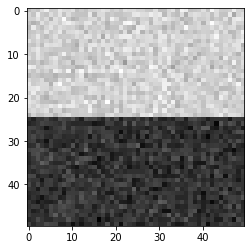

In [120]:
plt.imshow(XXX.reshape(50,50).T,cmap='gray')

In [153]:
conv = tf.keras.layers.Conv2D(1,(2,2))

In [154]:
conv(XXX.T)
conv.get_weights() # kernel, bias

[array([[[[ 0.40777367]],
 
         [[ 0.21101719]]],
 
 
        [[[ 0.12048817]],
 
         [[-0.16451102]]]], dtype=float32),
 array([0.], dtype=float32)]

In [155]:
w = [[-1.0,-1.0],[1.0,1.0]]
w = np.array(w).reshape(2,2,1,1)
b= np.array([0.0])
w, b

(array([[[[-1.]],
 
         [[-1.]]],
 
 
        [[[ 1.]],
 
         [[ 1.]]]]),
 array([0.]))

In [156]:
conv.set_weights([w,b])
conv.get_weights()

[array([[[[-1.]],
 
         [[-1.]]],
 
 
        [[[ 1.]],
 
         [[ 1.]]]], dtype=float32),
 array([0.], dtype=float32)]

In [157]:
# conv(XXX.T)

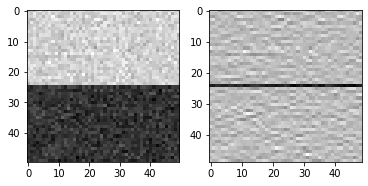

In [158]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(XXX.reshape(50,50).T,cmap='gray')
ax2.imshow(conv(XXX.T).reshape(49,49),cmap='gray')